# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

Certainly! Below is the provided content converted into a normal text format with the same structure for a Jupyter Notebook:

---

### 1. Problem Definition

For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

"How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?"

### 2. Data

Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), you can see it's a time series problem. This means there's a time attribute to the dataset.

In this case, it's historical sales data of bulldozers. Including things like model type, size, sale date, and more.

There are 3 datasets:

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1, 2012, to April 30, 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1, 2012, to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

### 3. Evaluation

For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

### 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this is to create a **data dictionary**.

For this dataset, Kaggle provides a data dictionary that contains information about what each attribute of the dataset means. You can [download this file directly from the Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) (account required) or view it on Google Sheets.

With all of this being known, let's get started!

First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimize, our first goal will be building a baseline model and seeing how it stacks up against the competition.

In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# import training and validating set 
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory =False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()
# we have got a fair few missing values 

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

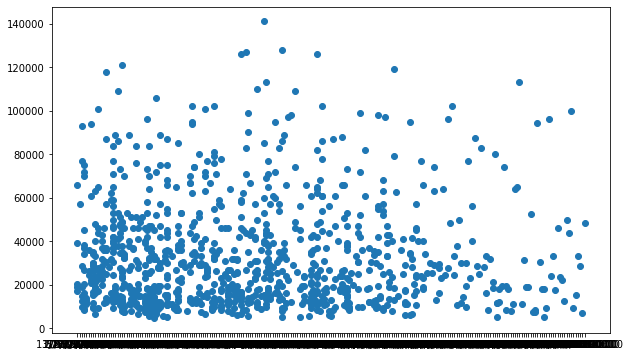

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

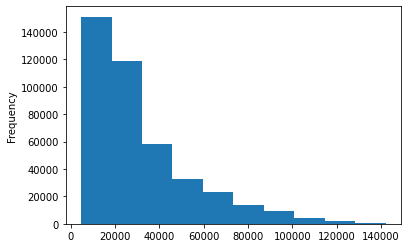

In [7]:
df.SalePrice.plot.hist();

### Parsing dates 

When working with time series data we want to enrich the time series component as much as possible 

We can do that by telling pandas which columns have dates in it using `pandas_date` parameter

In [8]:
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv', 
                low_memory=False,
                parse_dates=['saledate'])

In [9]:
df.saledate.dtype

dtype('<M8[ns]')

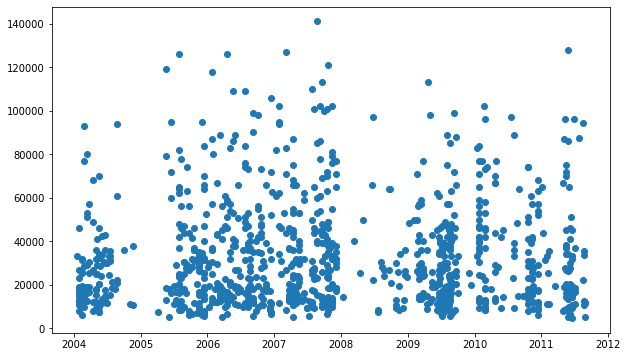

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

In [11]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [13]:
 ### we should sort the values by date 
df.sort_values(by=['saledate'], inplace=True, ascending=True)

In [14]:
df.saledate[:100]

# as we can see we have a sorted saledate now and the occurences are from 1989

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
113454   1989-01-31
62665    1989-01-31
78445    1989-01-31
233279   1989-02-01
28223    1989-02-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [15]:
# we sbould make a copy of the orignal dataset 

df_copy = df.copy()

df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Adding datetime parameter for saledate 


In [16]:
df_copy['saleyear'] = df_copy['saledate'].dt.year
df_copy['salemonth'] = df_copy['saledate'].dt.month
df_copy['saleday'] = df_copy['saledate'].dt.day
df_copy['saledayofWeek'] = df_copy['saledate'].dt.dayofweek
df_copy['saledayofYear'] = df_copy['saledate'].dt.dayofyear

In [17]:
df_copy.drop('saledate', axis=1, inplace=True)
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


 ### Modelling 
 lets try and do model driven Exploratory data analysis 

In [18]:
# we will try and build a machine learning model
from sklearn.ensemble import RandomForestRegressor 

reg = RandomForestRegressor(n_jobs=-1, random_state=16) # n_jobs=-1 means that the model will use as much as cores of pc as possible

X = df_copy.drop('SalePrice', axis = 1)
y = df_copy['SalePrice']

reg.fit(X,y)

ValueError: could not convert string to float: 'Low'

In [19]:
# by this we can check which all columns have string values in them 

for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [20]:
# now we should convert this values to category what it will do is give each of the string values a no. to them

for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label] = content.astype('category').cat.as_ordered()

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [22]:
# just to check that all our colums are converted 
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        
        # we didn't get aythig in output that means all values have been converted

In [23]:
 df_copy.to_csv('data/bluebook-for-bulldozers/train-copy.csv')

In [24]:
store = pd.read_csv('data/bluebook-for-bulldozers/train-copy.csv', low_memory=False)


In [25]:
store.info(), store.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                412698 non-null  int64  
 1   SalesID                   412698 non-null  int64  
 2   SalePrice                 412698 non-null  float64
 3   MachineID                 412698 non-null  int64  
 4   ModelID                   412698 non-null  int64  
 5   datasource                412698 non-null  int64  
 6   auctioneerID              392562 non-null  float64
 7   YearMade                  412698 non-null  int64  
 8   MachineHoursCurrentMeter  147504 non-null  float64
 9   UsageBand                 73670 non-null   object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

(None,
 Unnamed: 0                       0
 SalesID                          0
 SalePrice                        0
 MachineID                        0
 ModelID                          0
 datasource                       0
 auctioneerID                 20136
 YearMade                         0
 MachineHoursCurrentMeter    265194
 UsageBand                   339028
 fiModelDesc                      0
 fiBaseModel                      0
 fiSecondaryDesc             140727
 fiModelSeries               354031
 fiModelDescriptor           337882
 ProductSize                 216605
 fiProductClassDesc               0
 state                            0
 ProductGroup                     0
 ProductGroupDesc                 0
 Drive_System                305611
 Enclosure                      334
 Forks                       214983
 Pad_Type                    331602
 Ride_Control                259970
 Stick                       331602
 Transmission                224691
 Turbocharged        

## Filling the missing values 

1. Fill the missing numeric values 
2. Fill the string missing values 

In [26]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofWeek
saledayofYear


In [27]:
for label , content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add missing column with true false values 
            df_copy[label+'_is_missing'] = pd.isnull(content)
            # fill the missing numeric values with median 
            df_copy[label] = content.fillna(content.median())

In [28]:
df_copy['auctioneerID_is_missing'].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [29]:
df_copy['auctioneerID'].isna().sum()

0

### Filling the missing categorical values 

In [30]:
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        # adding binary column for later 
        df_copy[label+'_is_missing'] = pd.isnull(content)
        # Filling the missing column value with categorical codes 
        df_copy[label]= pd.Categorical(content).codes+1

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [32]:
df_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [33]:
df_copy

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True


In [34]:
 df_copy.to_csv('data/bluebook-for-bulldozers/train-copy.csv')

In [35]:
len(df_copy)

412698

In [36]:
%%time 

reg = RandomForestRegressor(n_jobs=-1, random_state=16)
X = df_copy.drop('SalePrice', axis = 1)
y = df_copy['SalePrice']

reg.fit(X, y)

CPU times: total: 28min 49s
Wall time: 2min 46s


RandomForestRegressor(n_jobs=-1, random_state=16)

In [37]:
reg.score(X,y)

0.9875824965003532

In [38]:
df_copy.saleyear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleyear, Length: 412698, dtype: int64

In [39]:
df_copy.saleyear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleyear, dtype: int64

In [40]:
# splliting data in training and valid as we have imported the train and valid csv

df_val = df_copy[df_copy.saleyear==2012]
df_train = df_copy[df_copy.saleyear!=2012]

len(df_val), len(df_train)

(11573, 401125)

In [41]:
# spliting data in X and y with respect to training and valid set 
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

In [42]:
len(X_valid), len(X_train)

(11573, 401125)

In [43]:
### Creating a fucntion that produces the root mean squared log error 

from sklearn.metrics import mean_squared_log_error, mean_absolute_error

# as the metric we are juding our score on is root mean squared log error we will create a fucntion that does it for us
def rmsle(y_true,y_preds):
    """
    Calculates root mean squared log error
    """
    msle = mean_squared_log_error(y_true, y_preds)
    return np.sqrt(msle)


# Create a evaluation model to see how it performs on diffrent metrics
def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    
    scores = {
        'Training Mean Absolute Error': mean_absolute_error(y_train,train_preds),
        'Valid Mean Absolute Error' :  mean_absolute_error(y_valid, val_preds),
        'Training RMSLE' : rmsle(y_train, train_preds),
        'Valid RMSLE' : rmsle(y_valid, val_preds) 
    }
    # could have also added r2_score there but we have one motive to see how it performs with rmsle
    return scores

### Training on a small subset to make the training time faster( also for hyperparameter tuning)

In [44]:
%%time 
# so there are two ways to do it either we can just slice the data and give it few samples that is required 
# or we can use a inbuilt parameter called max_samples in randomforestregressor


reg = RandomForestRegressor(n_jobs=-1, 
                           random_state=16,
                           max_samples=10000)

reg.fit(X_train, y_train)



CPU times: total: 1min 2s
Wall time: 6.08 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=16)

In [45]:
show_score(reg)

{'Training Mean Absolute Error': 5557.9266247429105,
 'Valid Mean Absolute Error': 7115.42190097641,
 'Training RMSLE': 0.2575127776728338,
 'Valid RMSLE': 0.29145823404152627}

### Hyperparameter tuning with RandomizedSearchCV


In [46]:
%%time

from sklearn.model_selection import RandomizedSearchCV
# create a param distribution 
rf_param = {
    'n_estimators': np.arange(10,100,10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2),
    'max_features':[0.5, 1, 'sqrt'],
    'max_samples': [10000]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=16), 
                             param_distributions=rf_param,
                             n_iter=5,
                             cv=5,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 36.8 s
Wall time: 1min 1s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=16),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [47]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 17,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [48]:
show_score(rs_model)

{'Training Mean Absolute Error': 6789.443324761259,
 'Valid Mean Absolute Error': 8092.288613862668,
 'Training RMSLE': 0.30304037739580664,
 'Valid RMSLE': 0.3252698150419423}

In [49]:
%%time
# These are the best params values after 100 iterations

ideal_model = RandomForestRegressor(n_jobs=-1,
                                    random_state=16,
                                    n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5
                                   )

ideal_model.fit(X_train, y_train)

CPU times: total: 5min 3s
Wall time: 31.2 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=16)

In [50]:
show_score(ideal_model), show_score(rs_model)
# scores for ideal model

({'Training Mean Absolute Error': 2956.581279727938,
  'Valid Mean Absolute Error': 5948.393277139548,
  'Training RMSLE': 0.14465684122126776,
  'Valid RMSLE': 0.24611526291360408},
 {'Training Mean Absolute Error': 6789.443324761259,
  'Valid Mean Absolute Error': 8092.288613862668,
  'Training RMSLE': 0.30304037739580664,
  'Valid RMSLE': 0.3252698150419423})

### Making prediction on test data 

In [51]:
# importing test data 
df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',
                     low_memory=False,
                     parse_dates=['saledate'])

df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [52]:
def preprocess_data(df):
    """
    Helps us convert the raw test data into the one's we factored like to the train and valid data
    """
    df['saleyear'] = df.saledate.dt.year
    df['salemonth'] = df.saledate.dt.month
    df['saleday'] = df.saledate.dt.day
    df['saledayofWeek'] = df.saledate.dt.dayofweek
    df['saledayofYear'] = df.saledate.dt.dayofyear
    
    df.drop('saledate', axis=1, inplace=True)
    
    # fill missing numeric values with row 
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #fill missing place with either 1/0 to know it was missing before
                df[label+'_is_missing'] = pd.isnull(content)
                # fill missing n7umeric values wih median
                df[label] =  content.fillna(content.median())
            
        if not pd.api.types.is_numeric_dtype(content):
            #fill missing place with either 1/0 to know it was missing before
            df[label+'_is_missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1

    return df

In [54]:
df_test = preprocess_data(df_test)

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [55]:
df_test.shape

(12457, 101)

In [56]:
test_preds = ideal_model.predict(df_test)
# this will give an error as we dont have the same columns names and we will have to set similar column names i similar order

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [57]:
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [58]:
df_test = df_test[X_train.columns]

In [59]:
test_preds = ideal_model.predict(df_test)
test_preds

array([17449.43763904, 20696.98186005, 46436.33727341, ...,
       13373.62002884, 17083.09843966, 26198.2788653 ])

In [60]:
# make the format into result format we want 
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17449.437639
1,1227844,20696.981860
2,1227847,46436.337273
3,1227848,61877.541818
4,1227863,53886.403629
...,...,...
12452,6643171,48083.360397
12453,6643173,12140.627919
12454,6643184,13373.620029
12455,6643186,17083.098440


In [61]:
# Export the prediction data 
df_preds.to_csv('data/bluebook-for-bulldozers/test_predictions.csv', index= False)

In [62]:
feature_importance = ideal_model.feature_importances_

feature_importance

array([3.26935153e-02, 2.30982702e-02, 4.29103977e-02, 2.19310940e-03,
       3.38414387e-03, 1.98910429e-01, 3.32560976e-03, 1.03463339e-03,
       4.50780359e-02, 4.16000437e-02, 6.57054080e-02, 4.52272191e-03,
       1.69265085e-02, 1.54876931e-01, 4.03647787e-02, 5.96875113e-03,
       5.09067860e-03, 3.18215470e-03, 2.95679553e-03, 6.20707662e-02,
       6.13742652e-04, 6.44736724e-05, 8.59113721e-04, 1.42865895e-04,
       1.54246919e-03, 1.98176845e-04, 1.29777066e-04, 1.20696625e-02,
       2.29269653e-03, 2.13940376e-04, 3.67446710e-03, 1.75970721e-03,
       4.92508715e-03, 6.48931311e-04, 3.15682973e-03, 1.17786347e-02,
       9.88032260e-04, 1.38221293e-02, 3.58453139e-03, 2.96659835e-03,
       1.18574030e-03, 8.22238262e-04, 1.60881162e-03, 6.28211150e-04,
       6.50109281e-04, 3.63107210e-04, 7.43590762e-04, 2.46283905e-03,
       8.70265131e-04, 4.42994176e-04, 1.30011161e-03, 7.32612776e-02,
       3.87113824e-03, 5.71511915e-03, 2.91466505e-03, 9.83067935e-03,
      

In [63]:
# making a function that would take 20 most important features and plot them on a graph

def plot_features(colums, important, n=20):
    df = (pd.DataFrame({'features':colums,
                        'feature importance':important}).sort_values('feature importance', ascending=False).reset_index(drop=True))
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.barh(df['features'][:n], df['feature importance'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

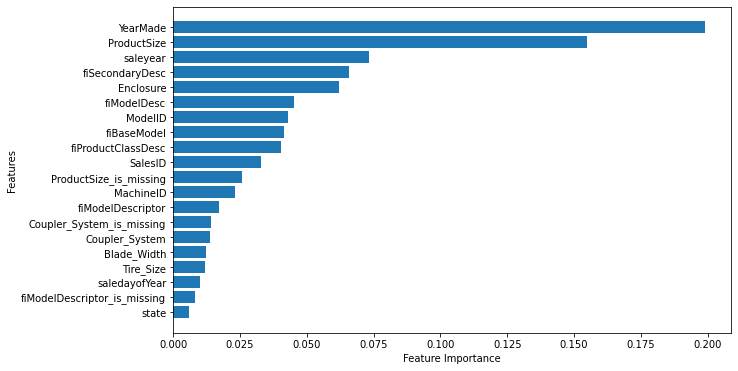

In [64]:
plot_features(X_train.columns, feature_importance)